In [5]:
!apt-get update
!apt install build-essential -y
!git clone https://github.com/Kaggle/kaggle-environments.git
!cd kaggle-environments && pip install .
!pip install vec-noise
!pip install scipy
!pip install pettingzoo
!pip install termcolor
!pip install gym
!pip install matplotlib
!cp -r kaggle-environments/kaggle_environments/envs/lux_ai_2022/test_agents/python/* ./
!pip install pygame

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.
Cloning into 'kaggle-environments'...
remote: Enumerating objects: 5055, done.
remote: Counting objects: 100% (743/743), done.
remote: Compressing objects: 100% (520/520), done.
remote: Total 5055 (delta 198), reused 705 (delta 171), pack-reused 4312
Receiving objects: 100% (5055/5055), 12.67 MiB | 1.47 MiB/s, done.
Resolving deltas: 100% (2801/2801), done.
Processing /workspace/kaggle-environments
  DEPRECATION: A future pip version will change local packages to be built in-place without firs

In [2]:
!git clone https://github.com/Jogima-cyber/HandyRL.git

Cloning into 'HandyRL'...
remote: Enumerating objects: 2927, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 2927 (delta 64), reused 76 (delta 46), pack-reused 2823
Receiving objects: 100% (2927/2927), 601.77 KiB | 1.96 MiB/s, done.
Resolving deltas: 100% (1999/1999), done.


In [1]:
!cd HandyRL && git branch -v -a

  master                    d8d61bb Fixed typo
* multi_unit                580dcd2 [ahead 1] handling sparse replay buffer
  remotes/origin/HEAD       -> origin/master
  remotes/origin/master     d8d61bb Fixed typo
  remotes/origin/multi_unit 367c70f Fixing issues : bad torch broadcasting somewhere leading to bad loss - disabling loss for disabled units - disabling entropy


In [4]:
!cd HandyRL && git checkout -b multi_unit origin/multi_unit

Branch 'multi_unit' set up to track remote branch 'multi_unit' from 'origin'.
Switched to a new branch 'multi_unit'


In [21]:
%%writefile HandyRL/config.yaml
env_args:
    env: 'handyrl.envs.Halite'
    #env: 'Geister'
    #env: 'HungryGeese'
    #env: 'handyrl.envs.parallel_tictactoe'  # specify by path

train_args:
    turn_based_training: False
    observation: False
    gamma: 0.999
    lambda: 0.98
    forward_steps: 32
    burn_in_steps: 0  # for RNNs
    compress_steps: 4
    entropy_regularization: 2.0e-3
    entropy_regularization_decay: 0.3
    update_episodes: 500
    batch_size: 50
    minimum_episodes: 100
    maximum_episodes: 2000000
    epochs: -1
    num_batchers: 12
    eval_rate: 0.1
    worker:
        num_parallel: 32
        
    policy_target: 'UPGO' # 'UPGO' 'VTRACE' 'TD' 'MC'
    value_target: 'TD' # 'VTRACE' 'TD' 'MC'
    
    eval:
        opponent: ['random']
    seed: 0
    restart_epoch: 2


worker_args:
    server_address: ''
    num_parallel: 8

Overwriting HandyRL/config.yaml


In [1]:
from kaggle_environments import make
env = make("halite", debug=False)
obs = env.reset(2)

In [2]:
obs[0].observation

{'remainingOverageTime': 60,
 'step': 0,
 'player': 0,
 'halite': [175,
  0,
  0,
  0,
  0,
  139,
  43,
  482,
  0,
  0,
  0,
  0,
  0,
  482,
  43,
  139,
  0,
  0,
  0,
  0,
  175,
  0,
  51,
  0,
  0,
  0,
  41,
  72,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  72,
  41,
  0,
  0,
  0,
  51,
  0,
  0,
  71,
  7,
  0,
  144,
  0,
  22,
  0,
  303,
  0,
  356,
  0,
  303,
  0,
  22,
  0,
  144,
  0,
  7,
  71,
  0,
  0,
  0,
  0,
  196,
  0,
  0,
  0,
  0,
  0,
  16,
  375,
  16,
  0,
  0,
  0,
  0,
  0,
  196,
  0,
  0,
  0,
  45,
  0,
  0,
  0,
  32,
  8,
  228,
  0,
  0,
  17,
  136,
  17,
  0,
  0,
  228,
  8,
  32,
  0,
  0,
  0,
  45,
  0,
  0,
  0,
  0,
  0,
  0,
  22,
  0,
  32,
  532,
  0,
  532,
  32,
  0,
  22,
  0,
  0,
  0,
  0,
  0,
  0,
  66,
  56,
  75,
  0,
  0,
  14,
  83,
  0,
  3,
  89,
  334,
  89,
  3,
  0,
  83,
  14,
  0,
  0,
  75,
  56,
  66,
  0,
  89,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  89,
  0,
  72,
  0,
  0,
 

In [20]:
from kaggle_environments.envs.halite.helpers import *
Board(raw_observation=obs[0].observation, \
      raw_configuration=env.configuration)

AttributeError: 'numpy.ndarray' object has no attribute 'observation'

In [ ]:
env.configuration

In [4]:
from kaggle_environments import make
from kaggle_environments.envs.halite.helpers import *
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from copy import deepcopy

class TorusConv2d(nn.Module):
    def __init__(self, input_dim, output_dim, kernel_size, bn):
        super().__init__()
        self.edge_size = (kernel_size[0] // 2, kernel_size[1] // 2)
        self.conv = nn.Conv2d(input_dim, output_dim, kernel_size=kernel_size)
        self.bn = nn.BatchNorm2d(output_dim) if bn else None

    def forward(self, x):
        h = torch.cat([x[:,:,:,-self.edge_size[1]:], x, x[:,:,:,:self.edge_size[1]]], dim=3)
        h = torch.cat([h[:,:,-self.edge_size[0]:], h, h[:,:,:self.edge_size[0]]], dim=2)
        h = self.conv(h)
        h = self.bn(h) if self.bn is not None else h
        return h


class HaliteNet(nn.Module):
    def __init__(self):
        super().__init__()
        layers, filters = 16, 128
        self.conv0 = TorusConv2d(9, filters, (3, 3), True)
        self.blocks = nn.ModuleList([TorusConv2d(filters, filters, (3, 3), True) for _ in range(layers)])
        
        self.head_ships_p = nn.Conv2d(filters, 6, kernel_size=1, stride=1)
        self.head_shipyards_p = nn.Conv2d(filters, 2, kernel_size=1, stride=1)
        self.head_v = nn.Linear(filters * 2, 1, bias=False)

    def forward(self, x, action=None):
        h = F.relu_(self.conv0(x))
        for block in self.blocks:
            h = F.relu_(h + block(h))
        ########################## /!\ ###########################
        # Do we concentrate around the ships of current player ? #
        ########################## /!\ ###########################
        #h_head = (h * x[:,:1]).view(h.size(0), h.size(1), -1).sum(-1)
        h_head = h.view(h.size(0), h.size(1), -1).sum(-1)
        h_avg = h.view(h.size(0), h.size(1), -1).mean(-1)
        ships_p = self.head_ships_p(h)
        shipyards_p = self.head_shipyards_p(h)
        v = torch.tanh(self.head_v(torch.cat([h_head, h_avg], 1)))
        
        #ships_logits = ships_p.reshape(-1,6,21*21)
        #shipyards_logits = shipyards_p.reshape(-1,2,21*21)
        #action = torch.cat([ships_logits, shipyards_logits], 1)
        
        p = torch.flatten(torch.cat([ships_p,shipyards_p], 1).transpose(-3,-2).transpose(-2,-1),1)
   
        return {'policy': p, 'value': v}

class Environment():
    NUM_AGENTS = 2
    def __init__(self, args={}):
        super().__init__()
        self.env = make("halite", debug=True)
        self.reset(self.NUM_AGENTS)
    
    def reset(self, args={}):
        del self.env
        self.env = make("halite", debug=True)
        obs = self.env.reset(self.NUM_AGENTS)
        self.done = False
        self.update((obs, {}), True)
        
    def update(self, info, reset):
        obs, last_actions = info
        if reset:
            self.obs_list = []
        self.obs_list.append(obs)
        self.last_actions = last_actions
    
    def get_observation(self, raw_obs, conf):
        raw_obs['remainingOverageTime'] = 60
        board = Board(raw_observation=raw_obs, \
                      raw_configuration=conf)

        obs = np.zeros((9,\
                        board.configuration.size,\
                        board.configuration.size), dtype=np.float32)

        current_player = board.current_player
        opponents = board.opponents

        # player halite
        obs[7] = current_player.halite/5000
        obs[8] = opponents[0].halite/5000

        # Halite map
        for c in board.cells:
            obs[(0,)+tuple(c)] = board.cells[c].halite/1000

        # Ships map
        for s in current_player.ships:
            obs[(1,)+tuple(s.position)] = 1
        for i,o in enumerate(opponents):
            for s in o.ships:
                obs[(i+2,)+tuple(s.position)] = 1

        # Ships halite map
        for s in current_player.ships:
            obs[(3,)+tuple(s.position)] = s.halite/1000
        for i,o in enumerate(opponents):
            for s in o.ships:
                obs[(i+4,)+tuple(s.position)] = s.halite/1000

        # Shipyard map
        for s in current_player.shipyards:
            obs[(5,)+tuple(s.position)] = 1
        for i,o in enumerate(opponents):
            for s in o.shipyards:
                obs[(i+6,)+tuple(s.position)] = 1

        return obs, board
    
    def step(self, actions):
        # state transition
        game_state = self.obs_list[-1][0].observation
        previous_board = Board(raw_observation=game_state,\
                               raw_configuration=self.env.configuration)
        
        for sy in previous_board.current_player.shipyards:
            a_id = 21*21 + sy.position.x*21+sy.position.y
            if actions.get(0, None)[a_id]:
                sy.next_action = ShipyardAction.SPAWN
        
        for s in previous_board.current_player.ships:
            a_id = s.position.x*21+s.position.y

            action = actions.get(0, None)[a_id]
            if action and action != 5:
                action = ShipAction.moves()[action-1]
                s.next_action = action
            elif action == 5:
                s.next_action = ShipAction.CONVERT
        
        for i,o in enumerate(previous_board.opponents):
            for sy in o.shipyards:
                a_id = 21*21 + sy.position.x*21+sy.position.y
                if actions.get(i+1, None)[a_id]:
                    sy.next_action = ShipyardAction.SPAWN
                
        for i,o in enumerate(previous_board.opponents):
            for s in o.ships:
                a_id = s.position.x*21+s.position.y

                action = actions.get(i+1, None)[a_id]
                if action and action != 5:
                    action = ShipAction.moves()[action-1]
                    s.next_action = action
                elif action == 5:
                    s.next_action = ShipAction.CONVERT
                
        obs = self.env.step([previous_board.current_player.next_actions,
                             previous_board.opponents[0].next_actions])
        self.done = not(obs[0].status=='ACTIVE' and obs[1].status=='ACTIVE')
        self.update((obs, actions), False)
                
    def observation(self, player=None):
        if player is None:
            player = 0
        game_state = deepcopy(self.obs_list[-1][0].observation)
        game_state.player = player
        peproc_obs, board = self.get_observation(game_state, self.env.configuration)
                    
        return peproc_obs
    
    def net(self):
        return HaliteNet()
    
    #
    # Should be defined in multi-action settings
    #
    def num_units(self):
        return self.env.configuration.size*self.env.configuration.size
    
    def action_mask(self, player):
        return np.zeros((self.env.configuration.size*self.env.configuration.size,8))
    
    def legal_units(self, player):
        lu = []
        game_state = self.obs_list[-1][0].observation
        for _, unit in game_state.players[player][-1].items():
            lu.append(unit[0])
            
        return np.array(lu)
            
    def legal_actions(self, player, pos=None):
        # return legal action list
        return list(range(8))
    
    def outcome(self):
        game_state = self.obs_list[-1]
        r1 = game_state[0].reward
        r2 = game_state[1].reward
        if r1 > r2:
            return {0:1,1:-1}
        if r1 < r2:
            return {0:-1,1:1}
        
        return {0:0.5,1:0.5}
    
    def players(self):
        return list(range(self.NUM_AGENTS))

In [5]:
env = Environment()

In [6]:
env.observation(1).shape

(9, 21, 21)

In [7]:
env.num_units()

441

In [8]:
test = env.step({
    0: np.ones((21*21*2),dtype=np.int64),
    1: 2+np.ones((21*21*2),dtype=np.int64),
})

In [9]:
env.outcome()

{0: 0.5, 1: 0.5}

In [10]:
player = 0
game_state = env.obs_list[-1][0].observation
board = Board(raw_observation=game_state,\
              raw_configuration=env.env.configuration)

if player:
    current_player = board.opponents[0]
else:
    current_player = board.current_player



In [11]:
for s in current_player.ships:
    print(s._observation[0])

194


In [12]:
for _, unit in env.obs_list[-1][0].observation.players[0][-1].items():
    x = unit[0]%21
    y = unit[0]//21
    print(x,y)

5 9


In [13]:
env.observation(0)[1][5,10]

0.0

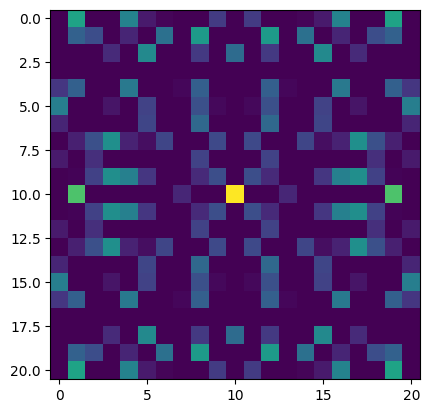

In [14]:
import matplotlib.pyplot as plt
plt.imshow(env.observation(0)[0])

In [196]:
net = HaliteNet()

In [197]:
net(torch.tensor(env.observation(0)).unsqueeze(0))['policy'].shape

torch.Size([1, 3528])

In [144]:
env.legal_units(1)

array([246])

In [145]:
from kaggle_environments import evaluate

In [146]:
env.env.render(mode="ipython", width=800, height=600)

In [8]:
%%writefile HandyRL/handyrl/envs/Halite.py

from kaggle_environments import make
from kaggle_environments.envs.halite.helpers import *
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from copy import deepcopy
from ..environment import BaseEnvironment

class TorusConv2d(nn.Module):
    def __init__(self, input_dim, output_dim, kernel_size, bn):
        super().__init__()
        self.edge_size = (kernel_size[0] // 2, kernel_size[1] // 2)
        self.conv = nn.Conv2d(input_dim, output_dim, kernel_size=kernel_size)
        self.bn = nn.BatchNorm2d(output_dim) if bn else None

    def forward(self, x):
        h = torch.cat([x[:,:,:,-self.edge_size[1]:], x, x[:,:,:,:self.edge_size[1]]], dim=3)
        h = torch.cat([h[:,:,-self.edge_size[0]:], h, h[:,:,:self.edge_size[0]]], dim=2)
        h = self.conv(h)
        h = self.bn(h) if self.bn is not None else h
        return h


class HaliteNet(nn.Module):
    def __init__(self):
        super().__init__()
        layers, filters = 16, 128
        self.conv0 = TorusConv2d(9, filters, (3, 3), True)
        self.blocks = nn.ModuleList([TorusConv2d(filters, filters, (3, 3), True) for _ in range(layers)])
        
        self.head_ships_p = nn.Conv2d(filters, 6, kernel_size=1, stride=1)
        self.head_shipyards_p = nn.Conv2d(filters, 2, kernel_size=1, stride=1)
        self.head_v = nn.Linear(filters * 2, 1, bias=False)

    def forward(self, x, action=None):
        h = F.relu_(self.conv0(x))
        for block in self.blocks:
            h = F.relu_(h + block(h))
        ########################## /!\ ###########################
        # Do we concentrate around the ships of current player ? #
        ########################## /!\ ###########################
        #h_head = (h * x[:,:1]).view(h.size(0), h.size(1), -1).sum(-1)
        h_head = h.view(h.size(0), h.size(1), -1).sum(-1)
        h_avg = h.view(h.size(0), h.size(1), -1).mean(-1)
        ships_p = self.head_ships_p(h)
        shipyards_p = self.head_shipyards_p(h)
        v = torch.tanh(self.head_v(torch.cat([h_head, h_avg], 1)))
        
        #ships_logits = ships_p.reshape(-1,6,21*21)
        #shipyards_logits = shipyards_p.reshape(-1,2,21*21)
        #action = torch.cat([ships_logits, shipyards_logits], 1)
        
        p_ships = torch.flatten(ships_p.transpose(-3,-2).transpose(-2,-1),1)
        p_shipyards = torch.flatten(shipyards_p.transpose(-3,-2).transpose(-2,-1),1)
   
        return {'policy_ships': p_ships, 'policy_shipyards': p_shipyards, 'value': v}

class Environment(BaseEnvironment):
    NUM_AGENTS = 2
    def __init__(self, args={}):
        super().__init__()
        self.env = make("halite", debug=True)
        self.reset(self.NUM_AGENTS)
    
    def reset(self, args={}):
        del self.env
        self.env = make("halite", debug=True)
        obs = self.env.reset(self.NUM_AGENTS)
        self.done = False
        self.update((obs, {}), True)
        
    def update(self, info, reset):
        obs, last_actions = info
        if reset:
            self.obs_list = []
        self.obs_list.append(obs)
        self.last_actions = last_actions
    
    def get_observation(self, raw_obs, conf):
        raw_obs['remainingOverageTime'] = 60
        board = Board(raw_observation=raw_obs, \
                      raw_configuration=conf)

        obs = np.zeros((9,\
                        board.configuration.size,\
                        board.configuration.size), dtype=np.float32)

        current_player = board.current_player
        opponents = board.opponents

        # player halite
        obs[7] = current_player.halite/5000
        obs[8] = opponents[0].halite/5000

        # Halite map
        for c in board.cells:
            obs[(0,)+tuple(c)] = board.cells[c].halite/1000

        # Ships map
        for s in current_player.ships:
            obs[(1,)+tuple(s.position)] = 1
        for i,o in enumerate(opponents):
            for s in o.ships:
                obs[(i+2,)+tuple(s.position)] = 1

        # Ships halite map
        for s in current_player.ships:
            obs[(3,)+tuple(s.position)] = s.halite/1000
        for i,o in enumerate(opponents):
            for s in o.ships:
                obs[(i+4,)+tuple(s.position)] = s.halite/1000

        # Shipyard map
        for s in current_player.shipyards:
            obs[(5,)+tuple(s.position)] = 1
        for i,o in enumerate(opponents):
            for s in o.shipyards:
                obs[(i+6,)+tuple(s.position)] = 1

        return obs, board
    
    def step(self, actions):
        # state transition
        game_state = self.obs_list[-1][0].observation
        previous_board = Board(raw_observation=game_state,\
                               raw_configuration=self.env.configuration)
        
        for sy in previous_board.current_player.shipyards:
            a_id = sy.position.x*21+sy.position.y
            if actions.get(0, None)['shipyards'][a_id]:
                sy.next_action = ShipyardAction.SPAWN

        for s in previous_board.current_player.ships:
            a_id = s.position.x*21+s.position.y
            
            action = actions.get(0, None)['ships'][a_id]
            if action and action != 5:
                action = ShipAction.moves()[action-1]
                s.next_action = action
            elif action == 5:
                s.next_action = ShipAction.CONVERT
        
        for i,o in enumerate(previous_board.opponents):
            for sy in o.shipyards:
                a_id = sy.position.x*21+sy.position.y
                if actions.get(i+1, None)['shipyards'][a_id]:
                    sy.next_action = ShipyardAction.SPAWN
                
        for i,o in enumerate(previous_board.opponents):
            for s in o.ships:
                a_id = s.position.x*21+s.position.y

                action = actions.get(i+1, None)['ships'][a_id]
                if action and action != 5:
                    action = ShipAction.moves()[action-1]
                    s.next_action = action
                elif action == 5:
                    s.next_action = ShipAction.CONVERT
                
        obs = self.env.step([previous_board.current_player.next_actions,
                             previous_board.opponents[0].next_actions])
        self.done = not(obs[0].status=='ACTIVE' and obs[1].status=='ACTIVE')
        self.update((obs, actions), False)
                
    def observation(self, player=None):
        if player is None:
            player = 0
        game_state = deepcopy(self.obs_list[-1][0].observation)
        game_state.player = player
        peproc_obs, board = self.get_observation(game_state, self.env.configuration)
                    
        return peproc_obs
    
    def net(self):
        return HaliteNet()
    
    #
    # Should be defined in multi-action settings
    #
    def turns(self):
        # players to move
        #return [p for p in self.players() if self.obs_list[-1][p]['status'] == 'ACTIVE']
        return [0, 1]
    
    def num_units(self):
        return self.env.configuration.size*self.env.configuration.size
    
    def action_mask_ships(self, player):
        return np.zeros((self.env.configuration.size*self.env.configuration.size,6))
    
    def action_mask_shipyards(self, player):
        return np.zeros((self.env.configuration.size*self.env.configuration.size,2))
    
    def legal_units_ships(self, player):
        lu = []
        game_state = self.obs_list[-1][0].observation
        board = Board(raw_observation=game_state,\
                      raw_configuration=self.env.configuration)
        
        if player:
            current_player = board.opponents[0]
        else:
            current_player = board.current_player
            
        for s in current_player.ships:
            lu.append(s._observation[0])
            
        return np.array(lu)
    
    def legal_units_shipyards(self, player):
        lu = []
        game_state = self.obs_list[-1][0].observation
        board = Board(raw_observation=game_state,\
                      raw_configuration=self.env.configuration)
        
        if player:
            current_player = board.opponents[0]
        else:
            current_player = board.current_player
            
        for sy in current_player.shipyards:
            lu.append(sy._observation)
            
        return np.array(lu)
            
    def legal_actions_ships(self, player, pos=None):
        # return legal action list
        return list(range(6))
    
    def legal_actions_shipyards(self, player, pos=None):
        # return legal action list
        return list(range(2))
    
    def terminal(self):
        # check whether terminal state or not
        return self.done
    
    def outcome(self):
        game_state = self.obs_list[-1]
        r1 = game_state[0].reward
        r2 = game_state[1].reward
        if r1 > r2:
            return {0:1,1:-1}
        if r1 < r2:
            return {0:-1,1:1}
        
        return {0:0.5,1:0.5}
    
    def players(self):
        return list(range(self.NUM_AGENTS))

Overwriting HandyRL/handyrl/envs/Halite.py


In [1]:
%%writefile HandyRL/handyrl/envs/LuxAI.py
from kaggle_environments import make
from lux.config import EnvConfig
from lux.kit import process_obs, to_json, from_json, process_action, obs_to_game_state
import json
import numpy as np
from copy import deepcopy
import torch
import torch.nn as nn
import torch.nn.functional as F
from luxai2022.env import LuxAI2022
from ..environment import BaseEnvironment
import matplotlib.pyplot as plt
import pickle as pkl

class IceLakes():
    def __init__(self, ice, rubble):
        self.factory_map = np.zeros((48,48))
        self.exact_factory_map = np.zeros((48,48))
        clusters = np.zeros((48,48))
        counter = 0
        cls = []
        self.ice = ice
        for i in range(48):
            for j in range(48):
                if not ice[i][j] or clusters[i][j]:
                    continue
                counter += 1
                _cls = []
                min_rubble = rubble[i][j]
                to_visit_stack = [[i,j]]
                while to_visit_stack:
                    el = to_visit_stack.pop()
                    
                    if True:#rubble[el[0]][el[1]] < 50:
                        _cls.append({"pos":el,"rubble":rubble[el[0]][el[1]]})
                    
                    clusters[el[0],el[1]] = counter
                    if min_rubble > rubble[el[0]][el[1]]:
                        min_rubble = rubble[el[0]][el[1]]

                    if el[0]<47 and ice[el[0]+1][el[1]] and not clusters[el[0]+1][el[1]]:
                        to_visit_stack.append((el[0]+1,el[1]))
                    if el[1]<47 and ice[el[0]][el[1]+1] and not clusters[el[0]][el[1]+1]:
                        to_visit_stack.append((el[0],el[1]+1))
                    if el[1]>0 and ice[el[0]][el[1]-1] and not clusters[el[0]][el[1]-1]:
                        to_visit_stack.append((el[0],el[1]-1))
                    if el[0]>0 and ice[el[0]-1][el[1]] and not clusters[el[0]-1][el[1]]:
                        to_visit_stack.append((el[0]-1,el[1]))
                if True:#min_rubble < 50:
                    _cls.sort(reverse=True,key=lambda c : c["rubble"])
                    cls.append({
                        "tiles":_cls,
                        "min_rubble": min_rubble
                    })
        cls.sort(reverse=False,key=lambda c : c["min_rubble"])
        """for c in cls:
            print(f"new class {c['min_rubble']}")
            for e in c["tiles"]:
                print(e["rubble"])"""
            
        self.cls = cls
        self.next_cls = 0
        self.__cls = deepcopy(cls)
    
    def spwan_ice_location(self, spawns, player_id):
        #print(f"{player_id} trying class with {self.cls[self.next_cls]['min_rubble']} min rubble")
        # /!\ All the ascii schemes are upward down : x and y axis have been exchanged
        while self.cls[self.next_cls]["tiles"]:
            el = self.cls[self.next_cls]["tiles"].pop()
            #print(f"tile {el['rubble']}")
            for i in range(len(spawns)):
                # spawn next to the water supply target tile
                # 012
                # !!! 0
                # !x! 1
                # !!! 2
                # .o.
                if el["pos"][1] > 2 and el["pos"][0] > 0 and el["pos"][0] < 47:
                    factory_pos = [el["pos"][0], el["pos"][1]-2]
                    # do not spawn a factory on another factory
                    if not self.factory_map[el["pos"][1], el["pos"][0]] and \
                        not (self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2]>0).any():
                        if spawns[i][0] == factory_pos[1] and spawns[i][1] == factory_pos[0]:
                            #print("succes")
                            self.next_cls = (self.next_cls+1)%(len(self.cls))

                            self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2] = 1
                            self.exact_factory_map[factory_pos[1],factory_pos[0]] = 1
                            return [factory_pos[1], factory_pos[0]]
                # 0123
                # .!!! 0
                # o!x! 1
                # .!!! 2
                if el["pos"][1]>0 and el["pos"][1]<47 and el["pos"][0]<47-2:
                    factory_pos = [el["pos"][0]+2, el["pos"][1]]
                    if not self.factory_map[el["pos"][1], el["pos"][0]] and \
                        not (self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2]>0).any():
                        if spawns[i][0] == factory_pos[1] and spawns[i][1] == factory_pos[0]:
                            #print("succes")
                            self.next_cls = (self.next_cls+1)%(len(self.cls))

                            self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2] = 1
                            self.exact_factory_map[factory_pos[1],factory_pos[0]] = 1
                            return [factory_pos[1], factory_pos[0]]
                
                # 012
                # .o.
                # !!!
                # !x!
                # !!!
                if el["pos"][1]<47-2 and el["pos"][0] > 0 and el["pos"][0] < 47:
                    factory_pos = [el["pos"][0], el["pos"][1]+2]
                    if not self.factory_map[el["pos"][1], el["pos"][0]] and \
                        not (self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2]>0).any():
                        if spawns[i][0] == factory_pos[1] and spawns[i][1] == factory_pos[0]:
                            #print("succes")
                            self.next_cls = (self.next_cls+1)%(len(self.cls))

                            self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2] = 1
                            self.exact_factory_map[factory_pos[1],factory_pos[0]] = 1
                            return [factory_pos[1], factory_pos[0]]

                # 0123
                # !!!. 0
                # !x!o 1
                # !!!. 2
                if el["pos"][1]>0 and el["pos"][1] < 47 and el["pos"][0]>2:
                    factory_pos = [el["pos"][0]-2, el["pos"][1]]
                    if not self.factory_map[el["pos"][1], el["pos"][0]] and \
                        not (self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2]>0).any():
                        if spawns[i][0] == factory_pos[1] and spawns[i][1] == factory_pos[0]:
                            #print("succes")
                            self.next_cls = (self.next_cls+1)%(len(self.cls))

                            self.factory_map[factory_pos[1]-1:factory_pos[1]+2,factory_pos[0]-1:factory_pos[0]+2] = 1
                            self.exact_factory_map[factory_pos[1],factory_pos[0]] = 1
                            return [factory_pos[1], factory_pos[0]]
       
        self.next_cls = (self.next_cls+1)%(len(self.cls))
        result = self.spwan_ice_location(spawns, player_id)
        return result

class Agent():
    def __init__(self, player_id):
        self.factories_owned = 0
        self.init_metal_left = 0
        self.init_water_left = 0
        self.prec_water = 0
        self.test_prec_water = 0
        self.prec_fact_water = 0
        self.prec_power = 51
        self.ice_lakes = None
        self.game_state = None
        self.total_water_supplied = 0
        self.total_water_collected = 0

        self.times_dug_upon_ice = 0
        self.total_times_dug_upon_ice = 0
        
        self.current_ice_supplied = 0
        
def early_steps(agent, obs, player, step):
    """
    Logic here to make actions in the early game. Select faction, bid for an extra factory, and place factories
    """
    # various maps to help aid in decision making over factory placement
    rubble = obs["board"]["rubble"]
    # if ice[y][x] > 0, then there is an ice tile at (x, y)
    ice = obs["board"]["ice"]
    # if ore[y][x] > 0, then there is an ore tile at (x, y)
    ore = obs["board"]["ore"]

    if step == 0:
        agent[player].ice_lakes = IceLakes(ice, rubble)
        # decide on a faction, and make a bid for the extra factory. 
        # Each unit of bid removes one unit of water and metal from your initial pool
        faction = "MotherMars"
        if player == "player_1":
            faction = "AlphaStrike"
        return dict(faction=faction, bid=10)
    elif step <= 1:
        # decide on where to spawn the next factory. Returning an empty dict() will skip your factory placement

        # how much water and metal you have in your starting pool to give to new factories
        water_left = obs["teams"][player]["water"]
        metal_left = obs["teams"][player]["metal"]
        # how many factories you have left to place
        factories_to_place = 2#obs["teams"][self.player]["factories_to_place"]
        if step == 1:
            # first step of factory placement, we save our initial pool of water and factory amount
            agent[player].factories_owned = factories_to_place
            agent[player].init_metal_left = metal_left
            agent[player].init_water_left = water_left
        # obs["teams"][self.opp_player] has the same information but for the other team
        # potential spawnable locations in your half of the map
        potential_spawns = obs["board"]["spawns"][player]
        # as a naive approach we randomly select a spawn location and spawn a factory there
        #spawn_loc = potential_spawns[np.random.randint(0, len(potential_spawns))]
        spawn_loc = agent[player].ice_lakes.spwan_ice_location(potential_spawns, player)
        #plt.imsave(f"factory_{self.player}_{step}.png", np.array(self.ice_lakes.factory_map))
        return dict(spawn=spawn_loc, 
                       metal=agent[player].init_metal_left // agent[player].factories_owned, 
                       water=agent[player].init_water_left // agent[player].factories_owned)
    else:
        return dict()

def generate_unit(obs, player):
    actions = dict()
    factories = obs["factories"][player]
    # iterate over all active factories
    for unit_id, factory in factories.items():
        actions[unit_id] = 0
    return actions

def move_unit(obs, player):
    actions = dict()
    units = obs["units"][player]
    # iterate over all active factories
    for unit_id, ship in units.items():
        actions[unit_id] = [np.array([0, 1, 0, 0, 0])]
    return actions

class TorusConv2d(nn.Module):
    def __init__(self, input_dim, output_dim, kernel_size, bn):
        super().__init__()
        self.edge_size = (kernel_size[0] // 2, kernel_size[1] // 2)
        self.conv = nn.Conv2d(input_dim, output_dim, kernel_size=kernel_size, padding='same')
        self.bn = nn.BatchNorm2d(output_dim) if bn else None

    def forward(self, x):
        #h = torch.cat([x[:,:,:,-self.edge_size[1]:], x, x[:,:,:,:self.edge_size[1]]], dim=3)
        #h = torch.cat([h[:,:,-self.edge_size[0]:], h, h[:,:,:self.edge_size[0]]], dim=2)
        h = self.conv(x)
        h = self.bn(h) if self.bn is not None else h
        return h


class GeeseNet(nn.Module):
    def __init__(self):
        super().__init__()
        layers, filters = 6, 32

        self.conv0 = TorusConv2d(7, filters, (3, 3), True)
        self.blocks = nn.ModuleList([TorusConv2d(filters, filters, (3, 3), True) for _ in range(layers)])
        self.head_p = nn.Conv2d(filters, 7, kernel_size=1, stride=1)
        self.head_v = nn.Linear(filters * 2, 1, bias=False)
        self.head_r = nn.Linear(filters * 2, 1, bias=False)

    def forward(self, x, _=None):
        h = F.relu_(self.conv0(x))
        for block in self.blocks:
            h = F.relu_(h + block(h))
        h_head = (h * x[:,4:5]).view(h.size(0), h.size(1), -1).sum(-1)
        h_avg = h.view(h.size(0), h.size(1), -1).mean(-1)
        
        p = torch.flatten(self.head_p(h).transpose(-3,-2).transpose(-2,-1),1)
        v = torch.tanh(self.head_v(torch.cat([h_head, h_avg], 1)))
        r = self.head_r(torch.cat([h_head, h_avg], 1))
        
        return {'policy': p, 'return': r}

class Environment(BaseEnvironment):
    NUM_AGENTS = 2
    ACTION = ['NORTH', 'SOUTH', 'WEST', 'EAST', 'DIG', 'TRANSFER', 'RECHARGE']
    
    def __init__(self, args={}):
        super().__init__()
        self.env = LuxAI2022(verbose=0, validate_action_space=False)
        self.reset()

    def reset(self, args={}):
        del self.env
        self.env = LuxAI2022(verbose=0, validate_action_space=False)
        obs = self.env.reset()
        self.done = False
        self.cstep = 0
        self.agent = {player_id: Agent(player_id) for player_id in obs}
        factories_per_team = np.inf
        while self.cstep <= factories_per_team + 1:
            if self.cstep == 0:
                for p in self.agent:
                    factories_per_team = obs[p]["board"]["factories_per_team"]
            
            obs, _, _, _ = self.env.step({p:process_action(early_steps(self.agent, obs[p], p, self.cstep)) for p in self.agent})
            self.cstep += 1

        obs, _, _, _ = self.env.step({p:process_action(generate_unit(obs[p], p)) for p in self.agent})
        self.cstep += 1
        
        self.update((obs, {}), True)
        for unit_id, factory in obs["player_0"]["factories"]["player_0"].items():
            self.agent["player_0"].prec_fact_water = factory["cargo"]["water"]
        for unit_id, factory in obs["player_1"]["factories"]["player_1"].items():
            self.agent["player_1"].prec_fact_water = factory["cargo"]["water"]
        
    def update(self, info, reset):
        obs, last_actions = info
        if reset:
            self.obs_list = []
            self.obs_list_opp = []
        self.obs_list.append(obs["player_0"])
        self.obs_list_opp.append(obs["player_1"])
        self.last_actions = last_actions

    def action2str(self, a, player=None):
        return self.ACTION[a]

    def str2action(self, s, player=None):
        return self.ACTION.index(s)

    def direction(self, pos_from, pos_to):
        if pos_from is None or pos_to is None:
            return None
        x, y = pos_from // 11, pos_from % 11
        for i, d in enumerate(self.DIRECTION):
            nx, ny = (x + d[0]) % 7, (y + d[1]) % 11
            if nx * 11 + ny == pos_to:
                return i
        return None
    
    def check_free_move(self, new_pos, action, pos):
        # action = direction (0 = center, 1 = up, 2 = right, 3 = down, 4 = left)
        if action == 1:
            if pos[1]>0:
                if new_pos[pos[1]-1, pos[0]]:
                    return False
                new_pos[pos[1]-1, pos[0]] = 1
                return True
            else:
                return False
        elif action == 2:
            if pos[0]<47:
                if new_pos[pos[1], pos[0]+1]:
                    return False
                new_pos[pos[1], pos[0]+1] = 1
                return True
            else:
                return False
        elif action == 3:
            if pos[1]<47:
                if new_pos[pos[1]+1, pos[0]]:
                    return False
                new_pos[pos[1]+1, pos[0]] = 1
                return True
            else:
                return False
        elif action == 4:
            if pos[0]>0:
                if new_pos[pos[1], pos[0]-1]:
                    return False
                new_pos[pos[1], pos[0]-1] = 1
                return True
            else:
                return False
        else:
            print("error")
    
    def step(self, actions):
        # state transition
        game_state = self.obs_list[-1]
        a1 = dict()
        a2 = dict()
        self.agent["player_0"].total_water_collected -= self.agent["player_0"].test_prec_water
        self.agent["player_0"].test_prec_water = 0
        
        new_pos1 = np.zeros((48,48))
        for unit_id, unit in game_state["units"]["player_0"].items():
            new_pos1[unit["pos"][1], unit["pos"][0]] = 1
        
        new_pos2 = np.zeros((48,48))
        for unit_id, unit in game_state["units"]["player_1"].items():
            new_pos2[unit["pos"][1], unit["pos"][0]] = 1
        
        for factory_id, factory in game_state["factories"]["player_0"].items():
            if not new_pos1[factory["pos"][1], factory["pos"][0]]:
                a1[factory_id] = 0
        for factory_id, factory in game_state["factories"]["player_1"].items():
            if not new_pos2[factory["pos"][1], factory["pos"][0]]:
                a2[factory_id] = 0
            
        for unit_id, unit in game_state["units"]["player_0"].items():
            self.agent["player_0"].total_water_collected += unit['cargo']['ice']
            self.agent["player_0"].test_prec_water += unit['cargo']['ice']
            pos = unit["pos"][0]+unit["pos"][1]*48
            a = actions.get(0, None)[pos]
            if a <= 3:
                if self.check_free_move(new_pos1, a+1, unit["pos"]):
                    new_pos1[unit["pos"][1], unit["pos"][0]] = 0
                    a1[unit_id] = [np.array([0, a+1, 0, 0, 0])]
            elif a == 4:
                if game_state["board"]["ice"][unit["pos"][1], unit["pos"][0]]:
                    self.agent["player_0"].times_dug_upon_ice += 1
                    self.agent["player_0"].total_times_dug_upon_ice += 1
                a1[unit_id] = [np.array([3, 0, 0, 0, 0])]
            elif a == 5:
                a1[unit_id] = [np.array([1, 0, 0, unit['cargo']['ice'], 0])]
                if unit['cargo']['ice'] > 0:
                    for _, factory in game_state["factories"]["player_0"].items():
                        if unit["pos"][0]<=factory["pos"][0]+1 and \
                            unit["pos"][0]>=factory["pos"][0]-1 and \
                            unit["pos"][1]<=factory["pos"][1]+1 and \
                            unit["pos"][1]>=factory["pos"][1]-1:
                            #print(f"transfer {unit['cargo']['ice']}")
                            #self.agent["player_0"].test_prec_water = 0
                            #self.agent["player_0"].prec_water = 0
                            self.agent["player_0"].current_ice_supplied += unit['cargo']['ice']
                            self.agent["player_0"].total_water_supplied += unit['cargo']['ice']
            else:
                """if unit['power'] < 50 and unit['cargo']['ice'] > 0:
                    print("transfer")"""
                a1[unit_id] = [np.array([2, 0, 4, 50, 0])]
        
        self.agent["player_1"].total_water_collected -= self.agent["player_1"].test_prec_water
        self.agent["player_1"].test_prec_water = 0
        for unit_id, unit in game_state["units"]["player_1"].items():
            self.agent["player_1"].total_water_collected += unit['cargo']['ice']
            self.agent["player_1"].test_prec_water += unit['cargo']['ice']
            pos = unit["pos"][0]+unit["pos"][1]*48
            a = actions.get(1, None)[pos]
            if a <= 3:
                if self.check_free_move(new_pos2, a+1, unit["pos"]):
                    new_pos2[unit["pos"][1], unit["pos"][0]] = 0
                    a2[unit_id] = [np.array([0, a+1, 0, 0, 0])]
            elif a == 4:
                a2[unit_id] = [np.array([3, 0, 0, 0, 0])]
                if game_state["board"]["ice"][unit["pos"][1], unit["pos"][0]]:
                    self.agent["player_1"].times_dug_upon_ice += 1
                    self.agent["player_1"].total_times_dug_upon_ice += 1
            elif a == 5:
                if unit['cargo']['ice'] > 0:
                    for _, factory in game_state["factories"]["player_1"].items():
                        if unit["pos"][0]<=factory["pos"][0]+1 and \
                            unit["pos"][0]>=factory["pos"][0]-1 and \
                            unit["pos"][1]<=factory["pos"][1]+1 and \
                            unit["pos"][1]>=factory["pos"][1]-1:
                            #print(f"transfer {unit['cargo']['ice']}")
                            #self.agent["player_1"].test_prec_water = 0
                            #self.agent["player_1"].prec_water = 0
                            self.agent["player_1"].current_ice_supplied += unit['cargo']['ice']
                            self.agent["player_1"].total_water_supplied += unit['cargo']['ice']
                
                a2[unit_id] = [np.array([1, 0, 0, unit['cargo']['ice'], 0])]
            else:
                """if unit['power'] < 50 and unit['cargo']['ice'] > 0:
                    print("transfer")"""
                a2[unit_id] = [np.array([2, 0, 4, 50, 0])]
        
        obs, _, dones, _ = self.env.step({"player_0":process_action(a1), "player_1":process_action(a2)})
        self.done = dones['player_0'] or dones['player_1']
        self.cstep += 1

        self.update((obs, actions), False)
        
    def diff_info(self, _):
        return self.obs_list[-1], self.last_actions

    def turns(self):
        # players to move
        #return [p for p in self.players() if self.obs_list[-1][p]['status'] == 'ACTIVE']
        return [0, 1]

    def terminal(self):
        # check whether terminal state or not
        if self.obs_list[-1]["real_env_steps"] <= 150 and not self.done:
            return False
        return True
    
    def reward(self):
        game_state = self.obs_list[-1]
        
        r1 = self.agent["player_0"].current_ice_supplied/200
        r2 = self.agent["player_1"].current_ice_supplied/200
        #r1 = -self.agent["player_0"].prec_water
        #r2 = -self.agent["player_1"].prec_water
        
        #self.agent["player_0"].prec_water = 0
        #self.agent["player_1"].prec_water = 0
        self.agent["player_0"].current_ice_supplied = 0
        self.agent["player_1"].current_ice_supplied = 0
        
        """for unit_id, factory in game_state["factories"]["player_0"].items():
            #r1 = (unit.cargo.ice-self.agent["player_0"].prec_water)/2+\
            #     (unit.power-self.agent["player_0"].prec_power)/50
            #r1 = (factory["cargo"]["water"]+1-self.agent["player_0"].prec_fact_water)/500
            self.agent["player_0"].total_water_supplied += (factory["cargo"]["water"]+1-self.agent["player_0"].prec_fact_water)/500
            self.agent["player_0"].prec_fact_water = factory["cargo"]["water"]
            self.agent["player_0"].prec_power = factory["power"]
        
        # 1/500=0.002 2/5000 = 0.0004
        for unit_id, factory in game_state["factories"]["player_1"].items():
            #r2 = (unit.cargo.ice-self.agent["player_1"].prec_water)/2+\
            #     (unit.power-self.agent["player_1"].prec_power)/50
            #r2 = (factory["cargo"]["water"]+1-self.agent["player_1"].prec_fact_water)/500
            self.agent["player_1"].total_water_supplied += (factory["cargo"]["water"]+1-self.agent["player_1"].prec_fact_water)/500
            self.agent["player_1"].prec_fact_water = factory["cargo"]["water"]
            self.agent["player_1"].prec_power = factory["power"]"""
        
        """for unit_id, unit in game_state["units"]["player_0"].items():
            r1 += unit['cargo']['ice']
            self.agent["player_0"].prec_water += unit['cargo']['ice']
            
        for unit_id, unit in game_state["units"]["player_1"].items():
            r2 += unit['cargo']['ice']
            self.agent["player_1"].prec_water += unit['cargo']['ice']
        
        r1 /= 4
        r2 /= 4"""
        """if r1 != 0 or r2 != 0:
            print(r1, r2)
        r1 += self.agent["player_0"].times_dug_upon_ice/8
        r2 += self.agent["player_1"].times_dug_upon_ice/8
        self.agent["player_0"].times_dug_upon_ice = 0
        self.agent["player_1"].times_dug_upon_ice = 0"""
        
        return {0: r1, 1: r2}
    
    def outcome(self):
        # return terminal outcomes
        game_state = self.obs_list[-1]
        
        #r1 = 0
        #r2 = 0
        r1 = self.agent["player_0"].total_water_supplied
        r2 = self.agent["player_1"].total_water_supplied
        #r1 = self.agent["player_0"].total_water_collected
        #r2 = self.agent["player_1"].total_water_collected
        """for unit_id, factory in game_state["factories"]["player_0"].items():
            r1 += factory["cargo"]["ice"]"""
        
        """for unit_id, factory in game_state["factories"]["player_1"].items():
            r2 += factory["cargo"]["ice"]"""
        if r1 > r2:
            print("end", r1, r2, len(game_state["units"]["player_0"]), len(game_state["units"]["player_1"]))
            return {0: 1, 1: -1}
        elif r2 > r1:
            print("end", r1, r2, len(game_state["units"]["player_0"]), len(game_state["units"]["player_1"]))
            return {0: -1, 1: 1}
        else:
            """if self.agent["player_0"].total_times_dug_upon_ice>self.agent["player_1"].total_times_dug_upon_ice:
                return {0: 1, 1: -1}
            elif self.agent["player_0"].total_times_dug_upon_ice>self.agent["player_1"].total_times_dug_upon_ice:
                return {0: -1, 1: 1}
            else:"""
            return {0: 0, 1: 0}
    
    #
    # Should be defined in multi-action settings
    #
    def num_units(self):
        return 48*48
    
    def action_mask(self, player):
        return np.zeros((48*48,len(self.ACTION)))
    
    def legal_units(self, player):
        lu = []
        game_state = self.obs_list[-1]
        for _, unit in game_state["units"][f"player_{player}"].items():
            posx = unit["pos"][0]
            posy = unit["pos"][1]*48
            lu.append(posx+posy)
            
        return np.array(lu)
            
    def legal_actions(self, player, pos=None):
        # return legal action list
        """game_state = self.obs_list[-1]
        for _, unit in game_state["units"][f"player_{player}"].items():
            for _, factory in game_state["factories"][f"player_{player}"].items():
                if unit["pos"][0]==factory["pos"][0] and unit["pos"][1]==factory["pos"][1]:
                    return list(range(len(self.ACTION)))
                
        return list(range(len(self.ACTION)-1))"""
        # unit["pos"] is expressed as (x,y), where (0,0) is top left corner
        """posx = pos % 48
        posy = pos // 48
        game_state = self.obs_list[-1]
        for _, unit in game_state["units"][f"player_{player}"].items():
            if unit["pos"][0] == posx and unit["pos"][1] == posy:
                return list(range(len(self.ACTION)))
        
        return []"""
        return list(range(len(self.ACTION)))

    def players(self):
        return list(range(self.NUM_AGENTS))

    def net(self):
        return GeeseNet()
    
    def observation(self, player=None):
        if player is None:
            player = 0
        game_state = self.obs_list[-1]

        peproc_obs = np.zeros((7,48,48), dtype=np.float32)
        peproc_obs[0] = np.array(game_state["board"]["rubble"])/100
        peproc_obs[1] = np.array(game_state["board"]["ice"])
        for unit_id, factory in game_state["factories"][f"player_{player}"].items():
            peproc_obs[2][factory["pos"][1]-1:factory["pos"][1]+2, factory["pos"][0]-1:factory["pos"][0]+2] = 1+factory["cargo"]["water"]/1000

        for unit_id, factory in game_state["factories"][f"player_{(player+1)%2}"].items():
            peproc_obs[3][factory["pos"][1]-1:factory["pos"][1]+2, factory["pos"][0]-1:factory["pos"][0]+2] = 1+factory["cargo"]["water"]/1000
        
        for unit_id, unit in game_state["units"][f"player_{player}"].items():
            peproc_obs[4][unit["pos"][1], unit["pos"][0]] = 1+unit["power"]/100
            peproc_obs[5][unit["pos"][1], unit["pos"][0]] = unit["cargo"]["ice"]/100
        
        for unit_id, unit in game_state["units"][f"player_{(player+1)%2}"].items():
            peproc_obs[6][unit["pos"][1], unit["pos"][0]] = 1
                    
        return peproc_obs

Overwriting HandyRL/handyrl/envs/LuxAI.py


In [6]:
!rm kaggle-environments/kaggle_environments/envs/lux_ai_2022/test_agents/python/agent.py
!rm kaggle-environments/kaggle_environments/envs/lux_ai_2022/test_agents/python/main.py
!rm kaggle-environments/kaggle_environments/envs/lux_ai_2022/test_agents/python/README.md

In [7]:
!cp -r kaggle-environments/kaggle_environments/envs/lux_ai_2022/test_agents/python/* ./HandyRL/

In [29]:
!cd HandyRL && python main.py --train

{'env_args': {'env': 'handyrl.envs.Halite'}, 'train_args': {'turn_based_training': False, 'observation': False, 'gamma': 0.999, 'lambda': 0.98, 'forward_steps': 32, 'burn_in_steps': 0, 'compress_steps': 4, 'entropy_regularization': 0.002, 'entropy_regularization_decay': 0.3, 'update_episodes': 500, 'batch_size': 64, 'minimum_episodes': 100, 'maximum_episodes': 2000000, 'epochs': -1, 'num_batchers': 12, 'eval_rate': 0.1, 'worker': {'num_parallel': 32}, 'policy_target': 'UPGO', 'value_target': 'TD', 'eval': {'opponent': ['random']}, 'seed': 0, 'restart_epoch': 2}, 'worker_args': {'server_address': '', 'num_parallel': 8}}
started batcher 0
started batcher 1
started batcher 3
started batcher 2
started batcher 5
started batcher 6
started batcher 4
started batcher 8
started batcher 7
started batcher 9
started batcher 10
started batcher 11
waiting training
started server
started gather 0
started gather 1
opened worker 1
opened worker 3
opened worker 5
opened worker 9
opened worker 7
opened wo

In [1]:
import yaml

In [2]:
with open('HandyRL/config.yaml') as f:
    args = yaml.safe_load(f)
print(args)

{'env_args': {'env': 'handyrl.envs.Halite'}, 'train_args': {'turn_based_training': False, 'observation': False, 'gamma': 0.999, 'lambda': 0.98, 'forward_steps': 32, 'burn_in_steps': 0, 'compress_steps': 4, 'entropy_regularization': 0.002, 'entropy_regularization_decay': 0.3, 'update_episodes': 500, 'batch_size': 50, 'minimum_episodes': 10000, 'maximum_episodes': 2000000, 'epochs': -1, 'num_batchers': 12, 'eval_rate': 0.1, 'worker': {'num_parallel': 32}, 'policy_target': 'UPGO', 'value_target': 'TD', 'eval': {'opponent': ['random']}, 'seed': 0, 'restart_epoch': 2}, 'worker_args': {'server_address': '', 'num_parallel': 8}}


In [3]:
from HandyRL.handyrl.evaluation import Evaluator

In [4]:
from HandyRL.handyrl.environment import prepare_env, make_env
from HandyRL.handyrl.model import ModelWrapper, RandomModel
from HandyRL.handyrl.util import softmax

In [5]:
args['env_args']['env'] = 'HandyRL.'+args['env_args']['env']

In [6]:
prepare_env(args['env_args'])

In [7]:
env = make_env(args['env_args'])
env.reset()

In [8]:
evaluator = Evaluator(env, args)

In [9]:
def model_path(model_id):
    return os.path.join('HandyRL/models', str(model_id) + '.pth')

In [10]:
import torch
import os
model_epoch = args['train_args']['restart_epoch']
model = env.net()
if model_epoch > 0:
    model.load_state_dict(torch.load(model_path(model_epoch)), strict=False)

In [11]:
p_ships = model(torch.tensor(env.observation(0)).unsqueeze(0))['policy_ships'].detach().numpy().reshape(env.num_units(), -1)

In [12]:
p_ships.shape

(441, 6)

In [13]:
mask_ships = env.action_mask_ships(0)
legal_unit_ships = env.legal_units_ships(0)
p_ships = softmax(p_ships - mask_ships * 1e32)

In [14]:
import random
import numpy as np
for i in legal_unit_ships:
    print(i)
    print(random.choices(np.arange(p_ships.shape[-1]), weights=p_ships[i])[0])

115
4


In [15]:
p_ships[215]

array([0.02045496, 0.34439722, 0.31058917, 0.26039001, 0.02142827,
       0.04274038])

In [16]:
obs = env.observation(env.players()[0])
rd_model = RandomModel(model, obs)

In [17]:
evaluator.execute({0:ModelWrapper(rd_model),1:ModelWrapper(model),}, args)

agent: 5 115
agent: 5 325
env: 5 115
agent: 2 115
agent: 1 325
env: 2 115
agent: 2 136
agent: 1 115
agent: 4 326
agent: 4 325
env: 2 136
env: 1 115
agent: 3 157
agent: 3 116
agent: 0 115
agent: 1 305
agent: 4 304
agent: 4 325
env: 3 157
env: 3 116
env: 0 115
agent: 1 156
agent: 1 306
agent: 1 283
agent: 4 304
agent: 4 325
env: 1 156
agent: 2 157
agent: 3 115
agent: 2 307
agent: 4 284
agent: 4 283
agent: 4 304
agent: 2 325
env: 2 157
env: 3 115
agent: 2 178
agent: 4 114
agent: 5 115
agent: 1 328
agent: 4 263
agent: 4 262
agent: 3 283
agent: 3 346
agent: 1 325
env: 2 178
env: 4 114
env: 5 115
agent: 1 199
agent: 2 93
agent: 4 115
agent: 1 329
agent: 0 242
agent: 4 241
agent: 4 282
agent: 3 345
agent: 1 326
agent: 4 325
env: 1 199
env: 2 93
env: 4 115
agent: 5 200
agent: 2 114
agent: 0 94
agent: 1 115
agent: 0 330
agent: 0 242
agent: 4 220
agent: 4 261
agent: 2 344
agent: 1 327
agent: 4 304
agent: 0 325
env: 5 200
env: 2 114
env: 0 94
env: 1 115
agent: 1 135
agent: 0 94
agent: 2 116
agent

{'args': {'env_args': {'env': 'HandyRL.handyrl.envs.Halite'},
  'train_args': {'turn_based_training': False,
   'observation': False,
   'gamma': 0.999,
   'lambda': 0.98,
   'forward_steps': 32,
   'burn_in_steps': 0,
   'compress_steps': 4,
   'entropy_regularization': 0.002,
   'entropy_regularization_decay': 0.3,
   'update_episodes': 500,
   'batch_size': 50,
   'minimum_episodes': 10000,
   'maximum_episodes': 2000000,
   'epochs': -1,
   'num_batchers': 12,
   'eval_rate': 0.1,
   'worker': {'num_parallel': 32},
   'policy_target': 'UPGO',
   'value_target': 'TD',
   'eval': {'opponent': ['random']},
   'seed': 0,
   'restart_epoch': 2},
  'worker_args': {'server_address': '', 'num_parallel': 8}},
 'result': {0: -1, 1: 1},
 'opponent': 'random'}

In [18]:
len(evaluator.env.obs_list)

147

In [19]:
evaluator.env.env.render(mode="ipython", width=800, height=600)

In [52]:
from HandyRL.handyrl.agent import RandomAgent, RuleBasedAgent, Agent, EnsembleAgent, SoftAgent

In [54]:
agents = {0:Agent(ModelWrapper(rd_model)),1:Agent(ModelWrapper(model)),}
show = True

In [57]:
''' match with shared game environment '''
env.reset()

for agent in agents.values():
    agent.reset(env, show=show)
while not env.terminal():
    turn_players = env.turns()
    observers = env.observers()
    actions = {}
    for p, agent in agents.items():
        if p in turn_players:
            actions[p] = agent.action(env, p, show=show)
        elif p in observers:
            agent.observe(env, p, show=show)
    env.step(actions)
    
outcome = env.outcome()
if show:
    print('final outcome = %s' % outcome)

v = 0.000000
(441, 6)
p = [[166 166 166 166 166 166]
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]
 ...
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]]
v = 1.000000
(441, 6)
p = [[  0   0   0   0   0 999]
 [  0   0   0   0   0 999]
 [  0   0   0   0   0 999]
 ...
 [  0   0   0   0   0 999]
 [  0   0   0   0   0 999]
 [  0   0   0   0   0 999]]
v = 0.000000
(441, 6)
p = [[166 166 166 166 166 166]
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]
 ...
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]]
v = 1.000000
(441, 6)
p = [[  0   0   0   0   0 999]
 [  0   0   0   0   0 999]
 [  0   0   0   0   0 999]
 ...
 [  0   0   0   0   0 999]
 [  0   0   0   0   0 999]
 [  0   0   0   0   0 999]]
v = 0.000000
(441, 6)
p = [[166 166 166 166 166 166]
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]
 ...
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]
 [166 166 166 166 166 166]]
v = 1.000000
(441, 6)
p = [[  